# Project 5 - Leveraging Social Media to Map Natural Disasters

## Exploratory Data Analysis

1. [Imports](#Imports)
2. [Read in Data](#Read-in-Data)
1. [Hurricanes](#Hurricanes)
2. [Noreaster](#Noreaster)
3. [Tornado](#Tornado)
4. [Floods](#Floods)
5. [Mudslides](#Mudslides)
6. [Total Dataset](#Total-Dataset)

## Imports

In [2]:
# imports
import pandas as pd
import numpy as np             
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import regex as re
import matplotlib.pyplot as plt

from IPython.display import IFrame
from IPython.display import Image
import matplotlib.image as mpimg

# Allows us to see whole cells (untruncated)
pd.set_option('display.max_colwidth', -1)

## Read in Data

In [3]:
df = pd.read_csv('./data/clean_df.csv')

In [4]:
df.head()

,index,is_retweet,likes,replies,retweets,text,tweet_url,type,target,latitude,longitude
0,0,0.0,1,0.0,0.0,praying for yall in texas! #hurricaneharvey,/RedSoxNation52/status/901232720713469952,hurricane,0,29.622699,-95.243400
1,1,0.0,1,0.0,3.0,fyi #hurricaneharvey,/nataliereyy/status/901232720088637446,hurricane,0,30.067612,-95.696869
2,2,0.0,1,0.0,0.0,my prayers goes to everyone in texas being affected by #hurricaneharvey please be safe and ok,/sothiachhoeum2/status/901232719312670720,hurricane,0,29.898720,-95.837471
3,3,0.0,11,2.0,1.0,#hurricaneharvey is coming we are bunkering down trying to save battery life will more than likely lose power prayers for our state xo,/tayslade/status/901232707455389696,hurricane,0,29.795760,-95.285158
4,4,0.0,0,0.0,0.0,jim cantore is wearing a modded out baseball helmet on #theweatherchannel right now #safetyfirst #hurricaneharvey,/RebeccaBennitt/status/901232706247417856,hurricane,0,29.453960,-94.826653


Due to the size of the co-occurence matrix files, we were unable to create a file for hurricanes. However, it is still important to see the relationship of common words within the other natural disasters to visualize what people tweet during disasters

In [54]:
# Instantiate CountVectorizer to see which words are most common in each disaster
# Removed stop words to see the more unique words that appear
cust_list = ['flood', 'floods', 'flooding', 'hurricaneharvey', 'tornado', 'noreaster', 'mudslide', 'montecito', 'mudslides',
             'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 
              "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 
              'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 
              'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 
              'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 
              'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 
              'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 
              'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 
              'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 
              'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 
              'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 
              'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 
              'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor',
              'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will',
              'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've',
              'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't",
              'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn',
              "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', 
              "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
cvec = CountVectorizer(stop_words=cust_list)

In [5]:
# Separate the data into natural disaster type in order to be made into co-occurence matrix
floods = df[df['type'] == 'flood']
noreaster = df[df['type'] == 'noreaster']
mudslide = df[df['type'] == 'mudslide']
tornado = df[df['type'] == 'tornado']
hurricane = df[df['type'] == 'hurricane']

In [55]:
# Function to create co-occurence matrices in order to be imported into Gephi
def co_occur(df):
    X = df[['text']]
    p_stemmer = PorterStemmer()
    X['text'] = X['text'].apply(lambda x: " ".join([p_stemmer.stem(word) for word in x.split()]))
    cvec = CountVectorizer(stop_words = cust_list)
    X_vec = cvec.fit_transform(X['text'])
    X_vec_df = pd.DataFrame(X_vec.toarray(), columns= cvec.get_feature_names())
    # Make co-occurence matrix to plot with Gephi
    # Multiply with the transposed vectorized dataframe to itself
    X_tweets = X_vec.T * X_vec

    # Convert to array in order to fill the diagonal with zeroes, get rid of relation to same word
    X_tweets = X_tweets.toarray()
    np.fill_diagonal(X_tweets, 0)

    # Convert back to dataframe in order to export as csv to use with Gephi
    return pd.DataFrame(X_tweets, columns = X_vec_df.columns, index = X_vec_df.columns)

In [56]:
dfs = [floods, noreaster, mudslide, tornado]
dfs_str = ['floods','noreaster','mudslide', 'tornado']
for i, df in enumerate(dfs): 
    co_occur(df[df['target'] == 0]).to_csv(dfs_str[i] + 'gephi0.csv', sep = ',')

/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

In [57]:
for i, df in enumerate(dfs): 
    co_occur(df[df['target'] == 1]).to_csv(dfs_str[i] + 'gephi1.csv', sep = ',')

/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

## Hurricanes

### Negative Class

In [8]:
# Fit CountVectorizer to title
cvec.fit(df[(df['type'] == 'hurricane') & (df['target'] == 0)]['text'])
# Transform the corpus
X = cvec.transform(df[(df['type'] == 'hurricane') & (df['target'] == 0)]['text'])
# Convert X into a DataFrame
X_df = pd.DataFrame(X.toarray(), columns = cvec.get_feature_names())

In [9]:
# Looking at the initial list of most common words for the natural disaster
X_df.mean().sort_values(ascending=False)[0:11]

texas        0.142457
houston      0.136849
help         0.103473
harvey       0.093253
safe         0.057706
hurricane    0.053817
affected     0.049566
victims      0.047033
people       0.044863
relief       0.042420
please       0.041064
dtype: float64

In [10]:
# Visualization of most frequent words for the natural disaster
def bar_graph(df, title):
    plt.figure(figsize = (8, 8))
    (df.sum().sort_values(ascending=False)[0:10]).plot(kind = 'barh', color='cornflowerblue')
    plt.xlabel('Frequency', size = 15)
    plt.ylabel('Words', size = 15)
    plt.yticks(size = 15)
    plt.title(title, size = 15);

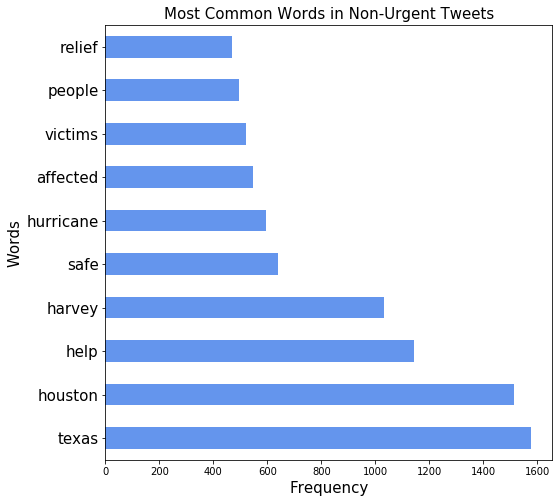

In [11]:
bar_graph(X_df, 'Most Common Words in Non-Urgent Tweets')

### Positive Class

In [12]:
# Fit CountVectorizer to title
cvec.fit(df[(df['type'] == 'hurricane') & (df['target'] == 1)]['text'])
# Transform the corpus
X = cvec.transform(df[(df['type'] == 'hurricane') & (df['target'] == 1)]['text'])
# Convert X into a DataFrame
X_df = pd.DataFrame(X.toarray(), columns = cvec.get_feature_names())

In [13]:
# Looking at the initial list of most common words for the natural disaster
X_df.mean().sort_values(ascending=False)[0:11]

help          0.209469
houston       0.179340
rescue        0.179340
texas         0.131994
harvey        0.090387
please        0.086083
lost          0.077475
joelosteen    0.074605
rescued       0.074605
people        0.071736
us            0.065997
dtype: float64

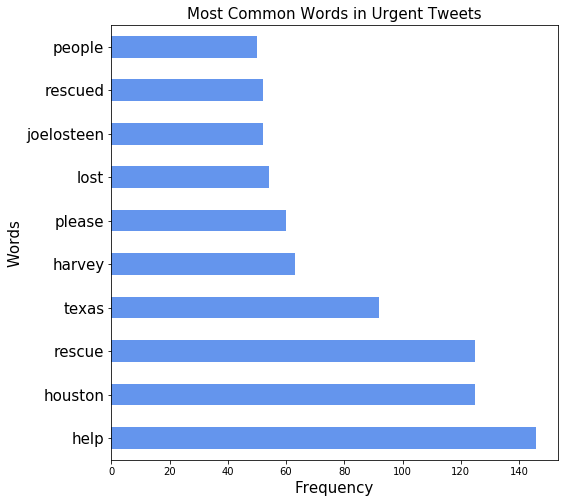

In [14]:
# Visualization of most frequent words for the natural disaster
bar_graph(X_df, 'Most Common Words in Urgent Tweets')

## Noreaster

### Negative Class

In [15]:
# Fit CountVectorizer to title
cvec.fit(df[(df['type'] == 'noreaster') & (df['target'] == 0)]['text'])
# Transform the corpus
X = cvec.transform(df[(df['type'] == 'noreaster') & (df['target'] == 0)]['text'])
# Convert X into a DataFrame
X_df = pd.DataFrame(X.toarray(), columns = cvec.get_feature_names())

In [16]:
# Looking at the initial list of most common words for the natural disaster
X_df.mean().sort_values(ascending=False)[0:11]

storm      0.124051
power      0.119349
latest     0.090416
snow       0.082821
boston     0.070524
weather    0.063291
wind       0.052080
like       0.050633
winds      0.046655
rain       0.045570
today      0.044846
dtype: float64

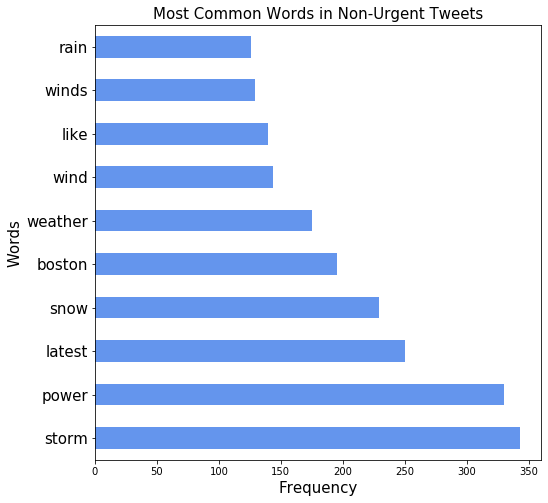

In [17]:
bar_graph(X_df, 'Most Common Words in Non-Urgent Tweets')

### Positive Class

In [18]:
# Fit CountVectorizer to title
cvec.fit(df[(df['type'] == 'noreaster') & (df['target'] == 1)]['text'])
# Transform the corpus
X = cvec.transform(df[(df['type'] == 'noreaster') & (df['target'] == 1)]['text'])
# Convert X into a DataFrame
X_df = pd.DataFrame(X.toarray(), columns = cvec.get_feature_names())

In [19]:
# Looking at the initial list of most common words for the natural disaster
X_df.mean().sort_values(ascending=False)[0:11]

power        0.226415
lost         0.188679
storm        0.144654
safe         0.106918
stuck        0.100629
dangerous    0.094340
weather      0.088050
fire         0.075472
high         0.075472
death        0.062893
work         0.062893
dtype: float64

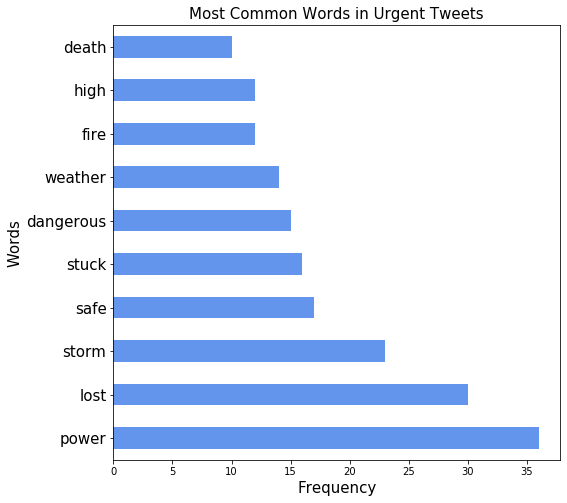

In [20]:
bar_graph(X_df, 'Most Common Words in Urgent Tweets')

### Text Network Graph

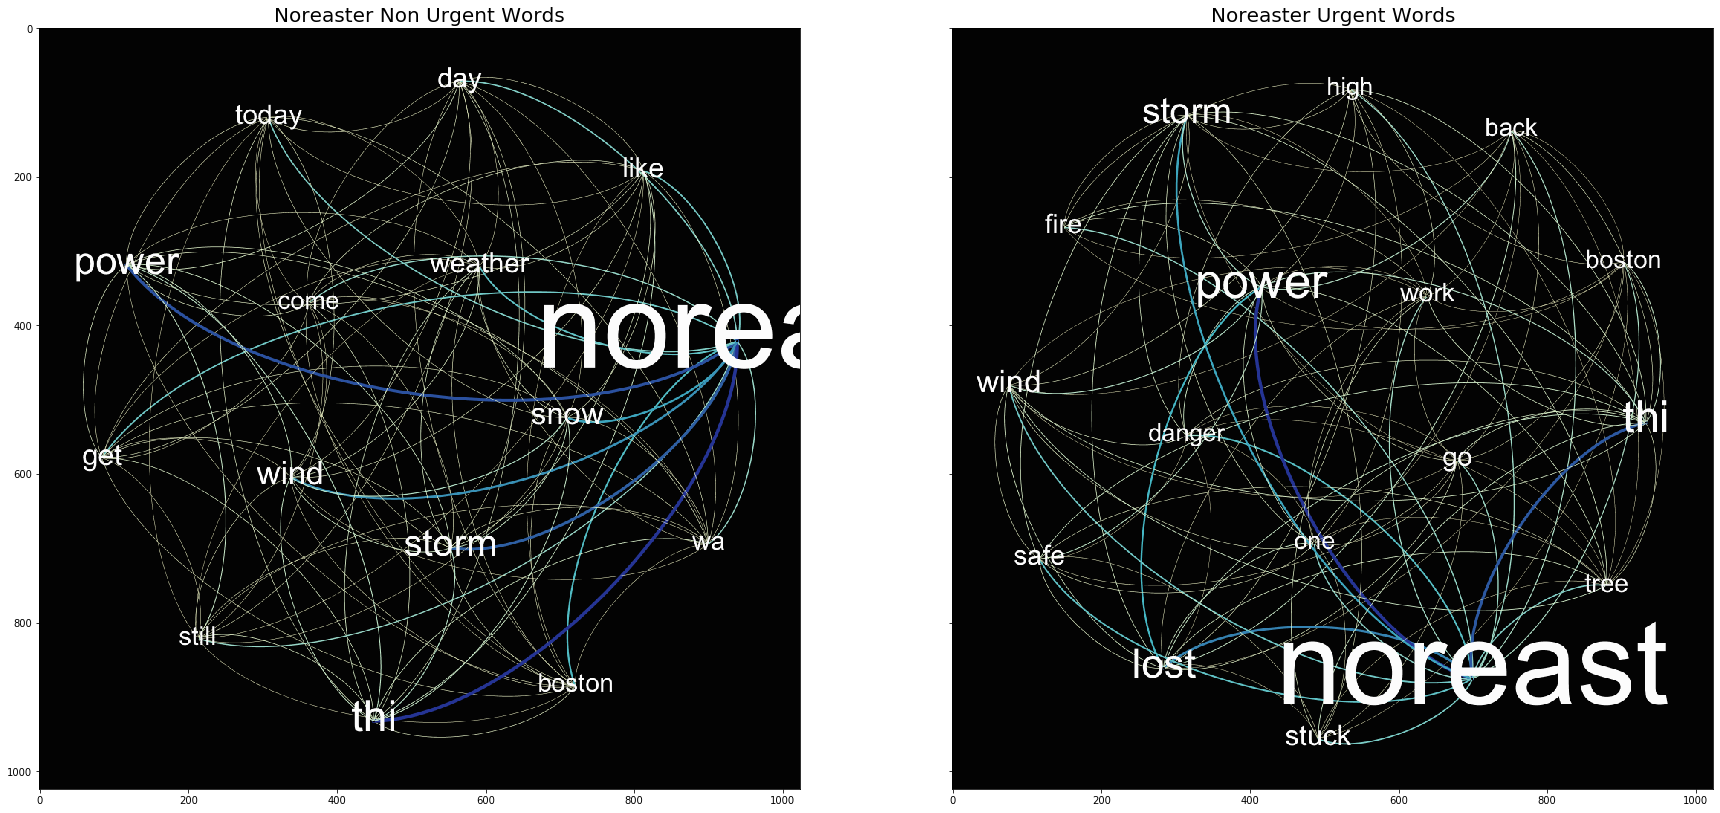

In [63]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (30,25))
ax1.imshow(mpimg.imread('./gephi/noreaster_target_0.png'))
ax2.imshow(mpimg.imread('./gephi/noreaster_target_1.png'))
ax1.set_title('Noreaster Non Urgent Words', size = 20)
ax2.set_title('Noreaster Urgent Words', size = 20);

## Tornado

### Negative Class

In [21]:
# Fit CountVectorizer to title
cvec.fit(df[(df['type'] == 'tornado') & (df['target'] == 0)]['text'])
# Transform the corpus
X = cvec.transform(df[(df['type'] == 'tornado') & (df['target'] == 0)]['text'])
# Convert X into a DataFrame
X_df = pd.DataFrame(X.toarray(), columns = cvec.get_feature_names())

In [22]:
# Looking at the initial list of most common words for the natural disaster
X_df.mean().sort_values(ascending=False)[0:11]

warning    0.321267
pm         0.208145
watch      0.201735
ms         0.179487
county     0.104072
weather    0.088235
severe     0.072398
damage     0.070513
cdt        0.070513
storm      0.069759
texas      0.066742
dtype: float64

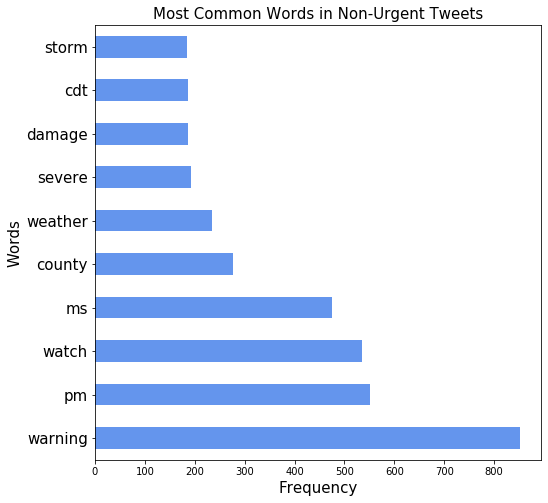

In [23]:
bar_graph(X_df, 'Most Common Words in Non-Urgent Tweets')

### Positive Class

In [24]:
# Fit CountVectorizer to title
cvec.fit(df[(df['type'] == 'tornado') & (df['target'] == 1)]['text'])
# Transform the corpus
X = cvec.transform(df[(df['type'] == 'tornado') & (df['target'] == 1)]['text'])
# Convert X into a DataFrame
X_df = pd.DataFrame(X.toarray(), columns = cvec.get_feature_names())

In [25]:
# Looking at the initial list of most common words for the natural disaster
X_df.mean().sort_values(ascending=False)[0:11]

texas        0.288288
injured      0.270270
pm           0.189189
storms       0.180180
franklin     0.180180
people       0.171171
several      0.162162
dangerous    0.162162
storm        0.162162
one          0.153153
suspected    0.144144
dtype: float64

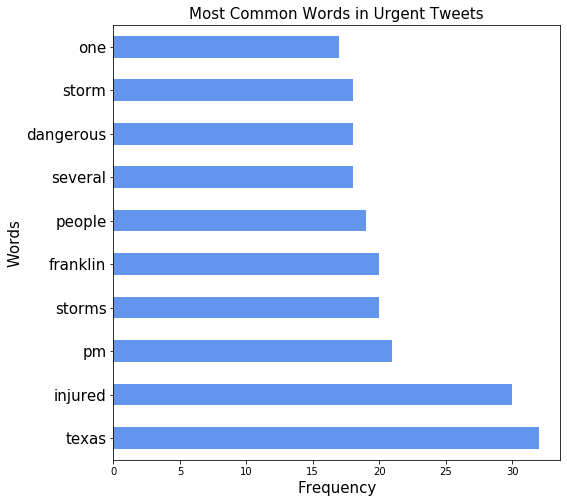

In [26]:
bar_graph(X_df, 'Most Common Words in Urgent Tweets')

### Text Network Graph

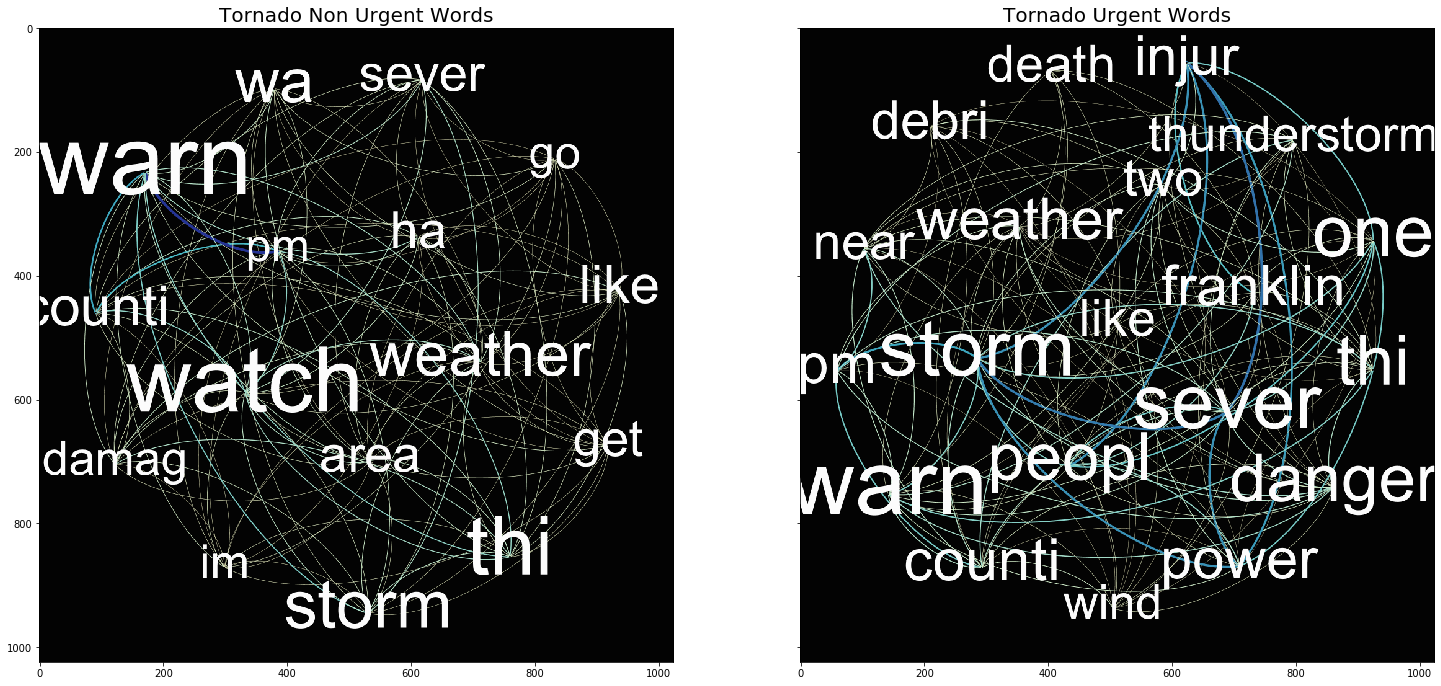

In [65]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (25,25))
ax1.imshow(mpimg.imread('./gephi/tornados_target_0.png'))
ax2.imshow(mpimg.imread('./gephi/tornados_target_1.png'))
ax1.set_title('Tornado Non Urgent Words', size = 20)
ax2.set_title('Tornado Urgent Words', size = 20);

## Floods

### Negative Class

In [27]:
# Fit CountVectorizer to title
cvec.fit(df[(df['type'] == 'flood') & (df['target'] == 0)]['text'])
# Transform the corpus
X = cvec.transform(df[(df['type'] == 'flood') & (df['target'] == 0)]['text'])
# Convert X into a DataFrame
X_df = pd.DataFrame(X.toarray(), columns = cvec.get_feature_names())

In [28]:
# Looking at the initial list of most common words for the natural disaster
X_df.mean().sort_values(ascending=False)[0:11]

flash      0.172892
pm         0.116673
warning    0.101656
edt        0.072006
watch      0.060839
county     0.057374
people     0.056604
rain       0.055064
issued     0.050443
im         0.049288
like       0.047747
dtype: float64

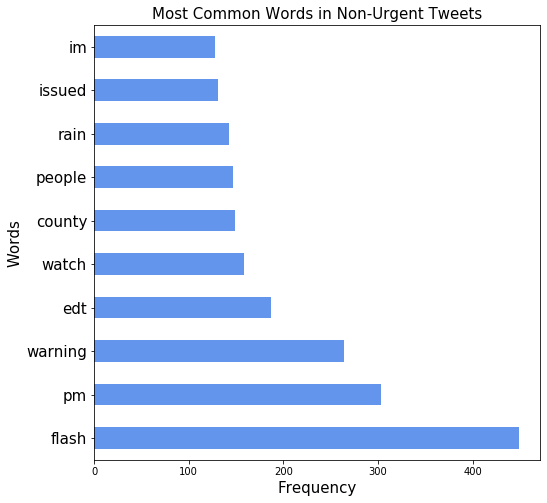

In [29]:
bar_graph(X_df, 'Most Common Words in Non-Urgent Tweets')

### Positive Class

In [30]:
# Fit CountVectorizer to title
cvec.fit(df[(df['type'] == 'flood') & (df['target'] == 1)]['text'])
# Transform the corpus
X = cvec.transform(df[(df['type'] == 'flood') & (df['target'] == 1)]['text'])
# Convert X into a DataFrame
X_df = pd.DataFrame(X.toarray(), columns = cvec.get_feature_names())

In [31]:
# Looking at the initial list of most common words for the natural disaster
X_df.mean().sort_values(ascending=False)[0:11]

water    0.214286
us       0.188312
fire     0.181818
flash    0.136364
rain     0.116883
fires    0.116883
lost     0.084416
death    0.084416
wayne    0.084416
one      0.077922
assam    0.071429
dtype: float64

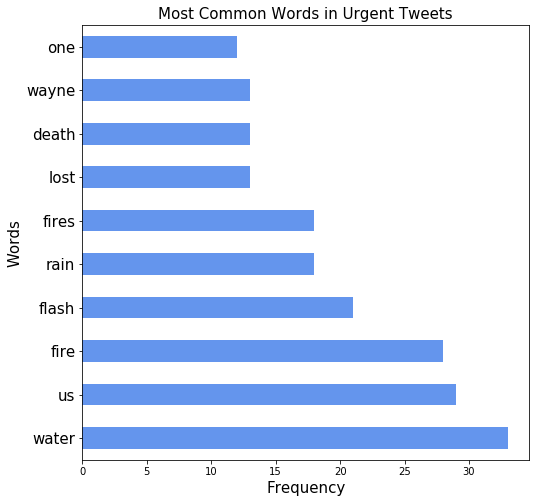

In [32]:
bar_graph(X_df, 'Most Common Words in Urgent Tweets')

### Text Network Graph

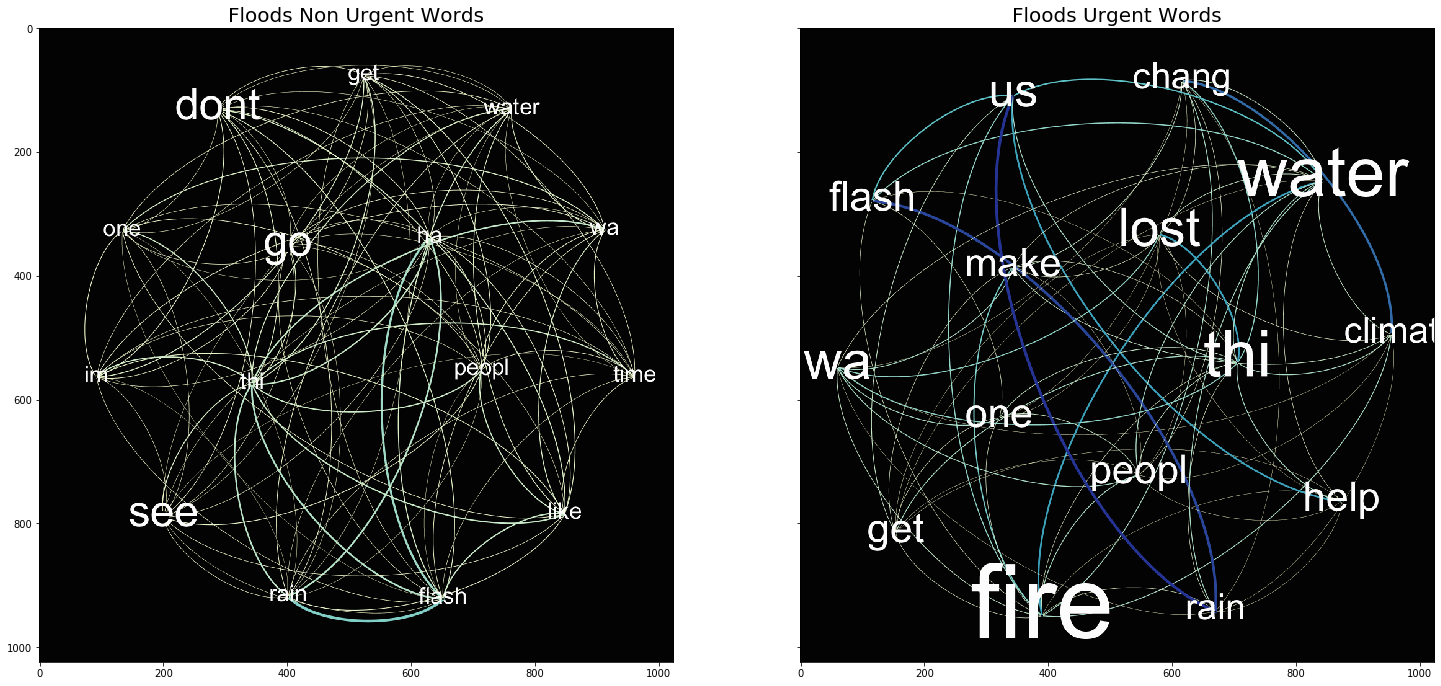

In [66]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (25,25))
ax1.imshow(mpimg.imread('./gephi/floods_target_0.png'))
ax2.imshow(mpimg.imread('./gephi/floods_target_1.png'))
ax1.set_title('Floods Non Urgent Words', size = 20)
ax2.set_title('Floods Urgent Words', size = 20);

## Mudslides

### Negative Class

In [40]:
# Fit CountVectorizer to title
cvec.fit(df[(df['type'] == 'mudslide') & (df['target'] == 0)]['text'])
# Transform the corpus
X = cvec.transform(df[(df['type'] == 'mudslide') & (df['target'] == 0)]['text'])
# Convert X into a DataFrame
X_df = pd.DataFrame(X.toarray(), columns = cvec.get_feature_names())

In [41]:
# Looking at the initial list of most common words for the natural disaster
X_df.mean().sort_values(ascending=False)[0:11]

california    0.394969
rain          0.128931
southern      0.127673
dead          0.125786
least         0.097484
people        0.096226
oprah         0.072327
via           0.069811
areas         0.067925
deadly        0.060377
news          0.059119
dtype: float64

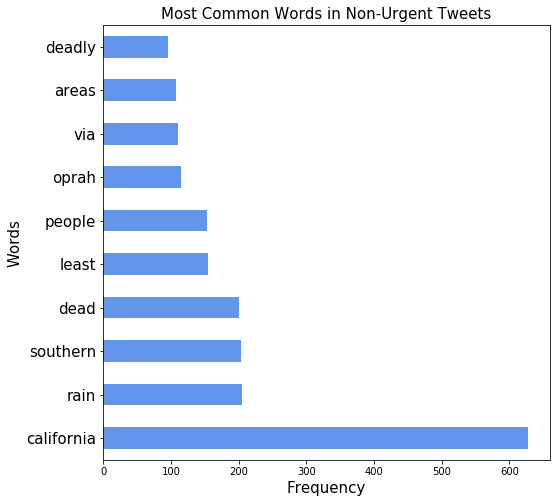

In [42]:
bar_graph(X_df, 'Most Common Words in Non-Urgent Tweets')

### Positive Class

In [43]:
# Fit CountVectorizer to title
cvec.fit(df[(df['type'] == 'mudslide') & (df['target'] == 1)]['text'])
# Transform the corpus
X = cvec.transform(df[(df['type'] == 'mudslide') & (df['target'] == 1)]['text'])
# Convert X into a DataFrame
X_df = pd.DataFrame(X.toarray(), columns = cvec.get_feature_names())

In [44]:
# Looking at the initial list of most common words for the natural disaster
X_df.mean().sort_values(ascending=False)[0:11]

california     0.501388
rain           0.204440
fires          0.140611
fire           0.140611
southern       0.137835
areas          0.134135
wildfires      0.117484
fireravaged    0.109158
people         0.099907
homes          0.097132
debris         0.096207
dtype: float64

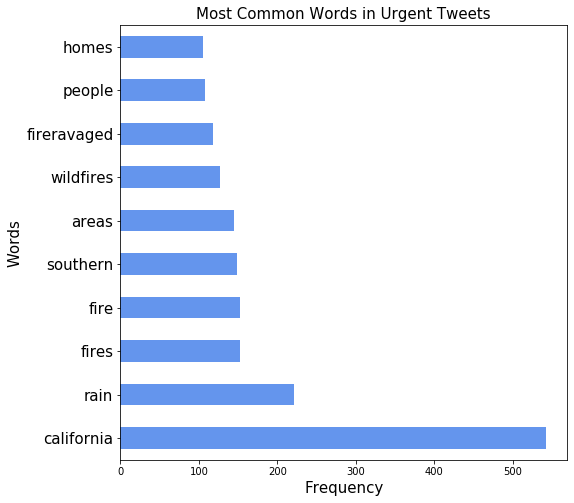

In [45]:
bar_graph(X_df, 'Most Common Words in Urgent Tweets')

### Text Network Graph

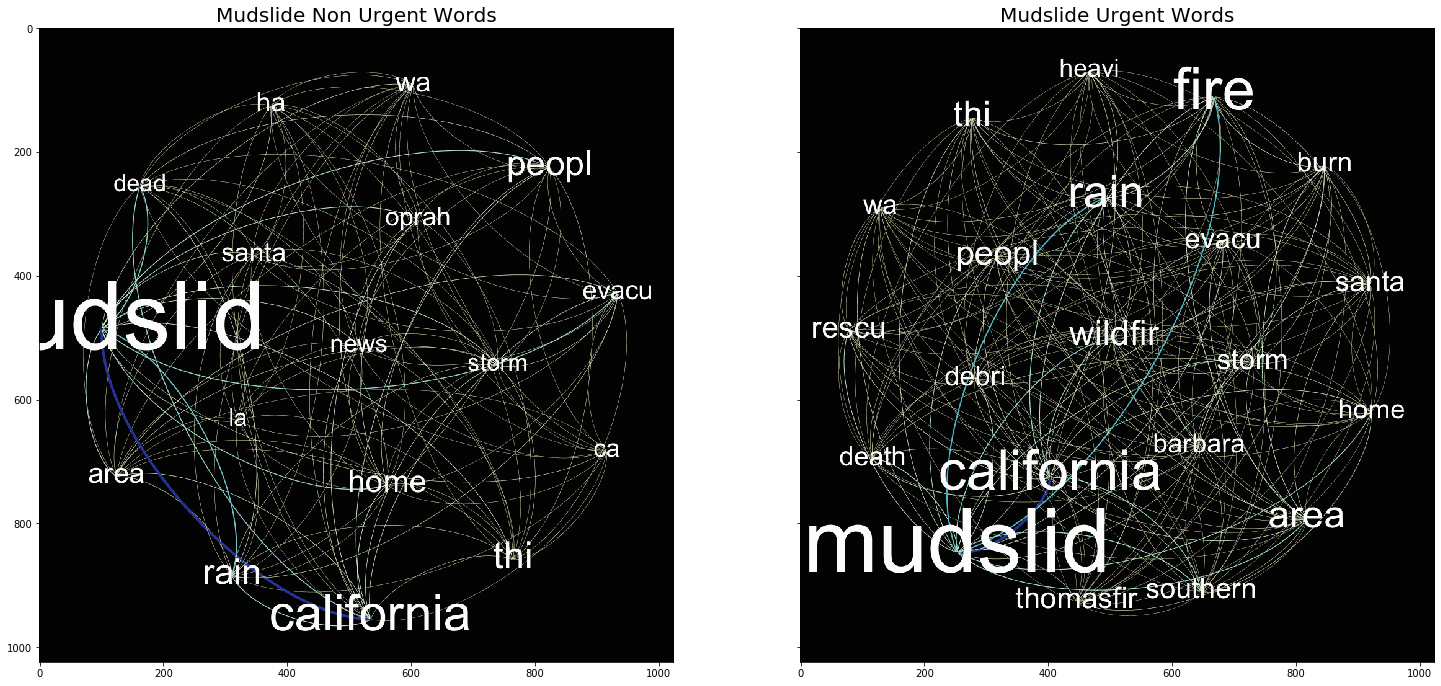

In [67]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (25,25))
ax1.imshow(mpimg.imread('./gephi/mudslides_target_0.png'))
ax2.imshow(mpimg.imread('./gephi/mudslides_target_1.png'))
ax1.set_title('Mudslide Non Urgent Words', size = 20)
ax2.set_title('Mudslide Urgent Words', size = 20);

## Total Dataset

### Negative Class

In [46]:
# Fit CountVectorizer to title
cvec.fit(df[df['target'] == 0]['text'])
# Transform the corpus
X = cvec.transform(df[df['target'] == 0]['text'])
# Convert X into a DataFrame
X_df = pd.DataFrame(X.toarray(), columns = cvec.get_feature_names())

In [47]:
# Looking at the initial list of most common words for the natural disaster
X_df.mean().sort_values(ascending=False)[0:11]

texas      0.085334
houston    0.074056
help       0.060358
warning    0.055566
harvey     0.050097
storm      0.046273
pm         0.045547
people     0.042885
safe       0.041239
watch      0.041045
rain       0.033107
dtype: float64

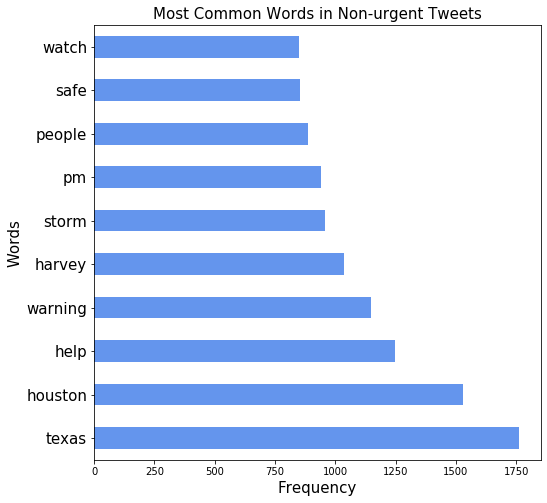

In [48]:
bar_graph(X_df, 'Most Common Words in Non-urgent Tweets')

### Positive Class

In [49]:
# Fit CountVectorizer to title
cvec.fit(df[df['target'] == 1]['text'])
# Transform the corpus
X = cvec.transform(df[df['target'] == 1]['text'])
# Convert X into a DataFrame
X_df = pd.DataFrame(X.toarray(), columns = cvec.get_feature_names())

In [50]:
# Looking at the initial list of most common words for the natural disaster
X_df.mean().sort_values(ascending=False)[0:11]

california    0.247956
rain          0.112625
fire          0.103542
rescue        0.096730
people        0.089010
help          0.087193
fires         0.080381
areas         0.072661
southern      0.069936
death         0.066303
storm         0.063124
dtype: float64

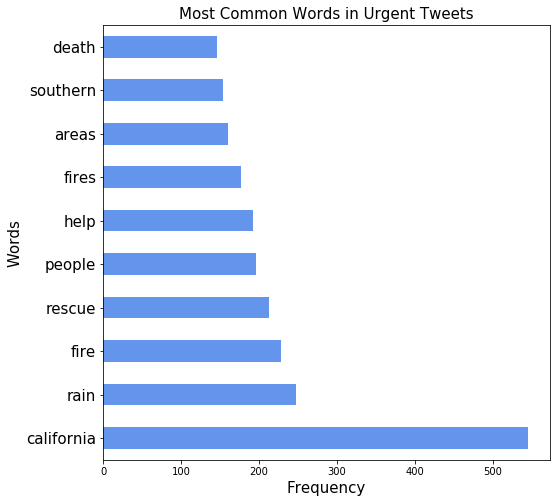

In [51]:
bar_graph(X_df, 'Most Common Words in Urgent Tweets')